# Import Libraries

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Manipulation Tools
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Models and Evaluations from Scikit-Learn
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# House Pricing Regression

## 1. Problem
Use machine learning to create a model that predicts the final price of a home given the features within the data sets.

## 2. Data
The data has been split into two groups, a training and test data set. Definition of the features can be found here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

## 3. Evaluation
The evaluation metric is the Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price..

## 4. Features
Use the above link from *Data* in order to see a Data Dictionary. You can also view the data_description.txt file for a more in-depth explanation of each features value.

## 5. Modeling

### 5.1 Data Exploration (Exploratory Data Anlysis)

In [17]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head() # 1460 observations

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are 81 features in our data set. It is too long to use the .isna().sum() call and see all the missing values, so we will write a function to see only the missing values. This can be used to call in the future after more feature engineering is done.

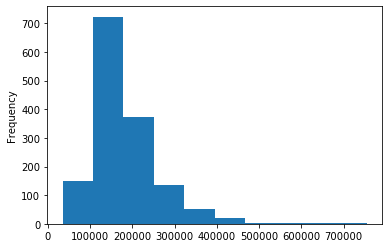

180921.19589041095

In [18]:
train_df.SalePrice.plot.hist()
plt.show()
train_df.SalePrice.mean()

In [19]:
def any_missing_values(data):
    features = data.columns
    print('Missing Value counts...')
    for name in features:
        if data[name].isna().sum():
            print('{} ({}): {}'.format(name, data[name].dtype, data[name].isna().sum()))

any_missing_values(train_df)

Missing Value counts...
LotFrontage (float64): 259
Alley (object): 1369
MasVnrType (object): 8
MasVnrArea (float64): 8
BsmtQual (object): 37
BsmtCond (object): 37
BsmtExposure (object): 38
BsmtFinType1 (object): 37
BsmtFinType2 (object): 38
Electrical (object): 1
FireplaceQu (object): 690
GarageType (object): 81
GarageYrBlt (float64): 81
GarageFinish (object): 81
GarageQual (object): 81
GarageCond (object): 81
PoolQC (object): 1453
Fence (object): 1179
MiscFeature (object): 1406


### Feature Engineering
First this we must do before converting any features to numerical is to handle the missing values. We will make the following changes:
- Fill Lot Frontage with the median value (more robust)
- Fill *Alley* missing values with 'None'
- Drop *MasVnrType* and *MasVnrArea* columns
- Fill *BsmtQual*, *BsmtCond*, and *BsmtExposure* missing values with 'No Basement'
- Fill *BsmtFinType1* and *BsmtFinType2* missing values with 'None'
- Fill *Electrical* column with the most common type
- Fill *FireplaceQu* missing values with 'None'
- Fill *GarageType*, *GarageYrBlt*, *GarageFinish*, *GarageQual*, and *GarageCond* missing values with 'No Garage'
- Fill *PoolQC* missing values with 'No Pool'
- Fill *Fence* missing values with 'No Fence'
- Fill *MiscFeature* missing values with 'None'

We need to see which columns are currently categorical, and change them into numerical. Since there are so many features, we will write a function to print the non-numerical features in our data set. This can be used after encoding and converting columns in the future to ensure all are numerical.

In [20]:
def data_types(data):
    features = data.columns
    columns = []
    print('Non Numerical Features...')
    for name in features:
        if not pd.api.types.is_numeric_dtype(train_df[name]): # take out 'not' to see only numeric columns
            columns.append(name)
    print(columns)

data_types(train_df)

Non Numerical Features...
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [22]:
def fill_missing_values(data):
    return None

In [15]:
encoder = LabelEncoder()
train_df['BsmtQual'] = train_df['BsmtQual'].fillna(value='None')
encoder.fit(list(train_df['BsmtQual'].unique()))
train_df['BsmtQual'] = encoder.transform(train_df['BsmtQual'])